In [1]:
print(1+2)

3


In [2]:

# -------------------------------
# 1. Create graph
# -------------------------------

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([(0,1), (1,2), (2,3), (3,0), (0,2)])



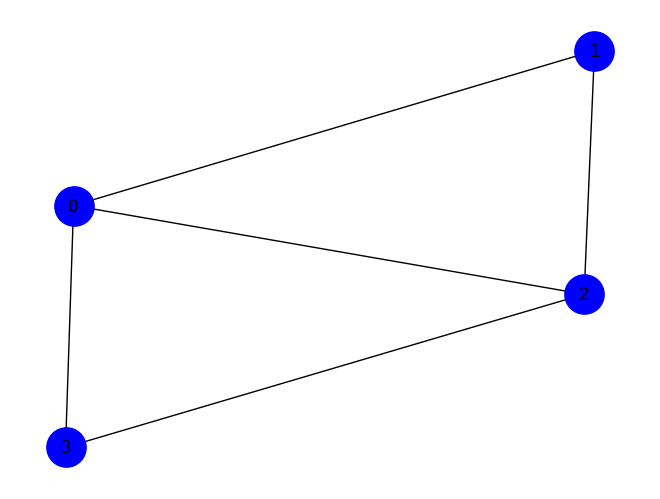

In [3]:
nx.draw(G, with_labels=True, node_color='blue', node_size=800)
plt.show()

In [4]:

# -------------------------------
# 2. Convert graph  =>  QUBO
# -------------------------------

from qiskit_optimization.applications import Maxcut

maxcut = Maxcut(G)
qubo = maxcut.to_quadratic_program()
print(qubo.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max-cut

Maximize
 obj: 3 x_0 + 2 x_1 + 3 x_2 + 2 x_3 + [ - 4 x_0*x_1 - 4 x_0*x_2 - 4 x_0*x_3
      - 4 x_1*x_2 - 4 x_2*x_3 ]/2
Subject To

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1

Binaries
 x_0 x_1 x_2 x_3
End



In [5]:
# -------------------------------
# 3. setup QAOA
# -------------------------------


from qiskit.algorithms.minimum_eigen_solvers import QAOA
from qiskit.algorithms.optimizers import COBYLA
from qiskit.utils import QuantumInstance
from qiskit_aer import Aer

backend = Aer.get_backend("aer_simulator")

qaoa = QAOA(
    optimizer=COBYLA(maxiter=100),
    reps=1,
    quantum_instance=QuantumInstance(backend)
)


/var/folders/7x/ghch8w1j37z38f_5vr6c_lw00000gn/T/ipykernel_91853/3237614480.py:16: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance=QuantumInstance(backend)
/var/folders/7x/ghch8w1j37z38f_5vr6c_lw00000gn/T/ipykernel_91853/3237614480.py:13: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.qaoa.QAOA`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.QAOA``. See https://qisk.it/algo_migration for a migration guide.
  qaoa = QAOA(


In [6]:
# -------------------------------
# 4. solve QUBO
# -------------------------------

from qiskit_optimization.algorithms import MinimumEigenOptimizer

solver = MinimumEigenOptimizer(qaoa)
result = solver.solve(qubo)

print("\n=== MaxCut Solution ===")
print("Bitstring:", result.x)
print("Objective (cut weight):", result.fval)



=== MaxCut Solution ===
Bitstring: [1. 0. 1. 0.]
Objective (cut weight): 4.0


Cut partition: [[1, 3], [0, 2]]


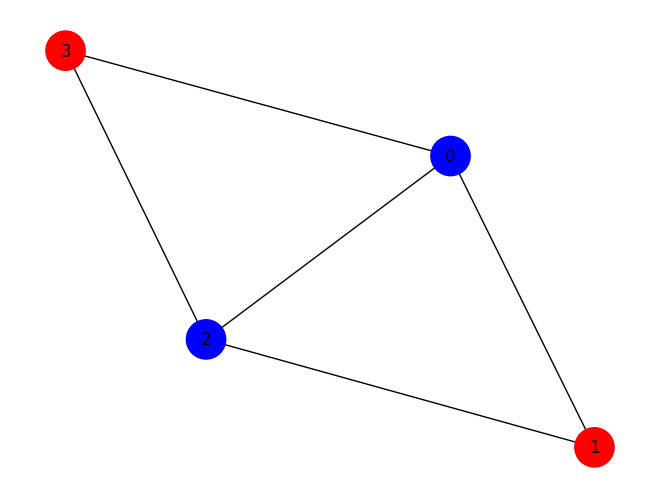

In [7]:
# -------------------------------
# 5. interpret result
# -------------------------------
import matplotlib.pyplot as plt

cut = maxcut.interpret(result)
print("Cut partition:", cut)



# -------------------------------
# 6. Plot graph
# -------------------------------
side_A, side_B = cut

color_map = []
for v in G.nodes():
    if v in side_A:
        color_map.append("red")
    else:
        color_map.append("blue")

nx.draw(G, with_labels=True, node_color=color_map, node_size=800)
plt.show()

